In [14]:
import os
import sys
import re
import uuid
import random
import imageio
import json
import numpy as np
import torch
import torch_scatter

from scipy import misc
from PIL import Image
from tqdm import tqdm
from enum import Enum
from IPython import display

import matplotlib.pyplot as plt

In [13]:
def as_gif(images, path="temp.gif"):
  # Render the images as the gif (15Hz control frequency):
  images[0].save(path, save_all=True, append_images=images[1:], duration=int(1000/15), loop=0)
  gif_bytes = open(path,"rb").read()
  return gif_bytes

In [3]:
data_dir = "../data/waymo_org/kitti_format"
info = np.load(os.path.join(data_dir, "waymo_infos_train.pkl"), allow_pickle=True)
print(f"{len(info)} images contained in waymo_infos_train.pkl")

info_seq = {}
# info[i]['image']['image_idx'] is of format {a}{bbb}{ccc}, a distinguishes train/val/test, 
# bbb is the sequence number, ccc is the frame number
for i in range(len(info)):
    seq_id = f"{info[i]['image']['image_idx']:07d}"[1:4]
    if seq_id not in info_seq:
        info_seq[seq_id] = []
    info_seq[seq_id].append(info[i])
print(f"{len(info_seq)} sequences contained in waymo_infos_train.pkl")

158081 images contained in waymo_infos_train.pkl


Randomly selected sequence: 372, 198 images


  0%|          | 0/197 [00:00<?, ?it/s]


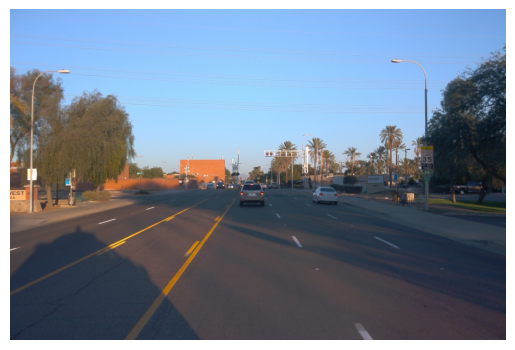

In [143]:
# rainy: 492, night:214, 642, dawn:200, cloudy: 253, 184, sunny: 648, 287, 372
seq_id = random.choice(list(info_seq.keys()))
seq_id = "372"
seq = info_seq[seq_id]
print(f"Randomly selected sequence: {seq_id}, {len(seq)} images")

plt.style.use("seaborn-v0_8-whitegrid")

images = []
for i in tqdm(range(0, len(seq) - 1)):
    img_path = os.path.join(data_dir, seq[i]['image']['image_path'])
    img = Image.open(img_path)
    # plt.imshow(img)
    # plt.axis('off')
    # break
    W, H = img.size
    img = img.resize((int(W / 8), int(H / 8)), Image.LANCZOS)
    images.append(img)

display.Image(as_gif(images))